# Bile Duct Classification

From the previous work we developed a segmentation pipeline that returns a labeled segmentation image for Sox9+ cells, holes corresponding to vessels, debris, fibrotic structures as mesenchyma and livers. Now, we will classify the segmented Sox9+ cels according to their morphology to distinguish between five different classes:

![Bile duct classes](bile_duct_classes.png "Bile duct classes")

1. Well formed
2. Functional
3. Opened Circle
4. Cluster
5. Single cells

In [1]:
from pathlib import Path

import apoc
import napari
import pandas as pd
import pyclesperanto_prototype as cle
from skimage.io import imread

from gulliver.classifier import predict_bile_duct_classes_from_table
from gulliver.io import get_image, get_labels_from_zarr, get_scale_from_zarr
from gulliver.segmenter import relabel_by_values
from gulliver.quantify import get_sox9_properties

cle.select_device("RTX")
print(cle.get_device().name)

c:\Users\agucor\Anaconda3\envs\bile_duct_clf\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


NVIDIA GeForce RTX 3060 Laptop GPU


In [2]:
DATA_DIR = Path("../data/N3 B9-1 10x.zarr")

image = get_image(DATA_DIR, 1)

zarr image already exists


In [3]:
lumen = get_labels_from_zarr(image, "lumen")

This way we have the whole image and the labels for Sox9 cells as well as veins. Here we can paint a couple structures with the class labels stated at the beginning of the document. There is no need to be strict eith painting every pixel or pixels inside the area, just paint!

04-Jan-24 14:40:48 - bfio.backends - WARNING  - Java backend is not available. This could be due to a missing dependency (jpype).
04-Jan-24 14:40:49 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C315C6E50>: None
04-Jan-24 14:40:49 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C315DD710>: None
04-Jan-24 14:40:49 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C315E7C50>: None
04-Jan-24 14:40:49 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C315F6290>: None
04-Jan-24 14:40:49 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C31608990>: None
04-Jan-24 14:40:49 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C3160F110>: None
04-Jan-24 14:40:49 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label obj

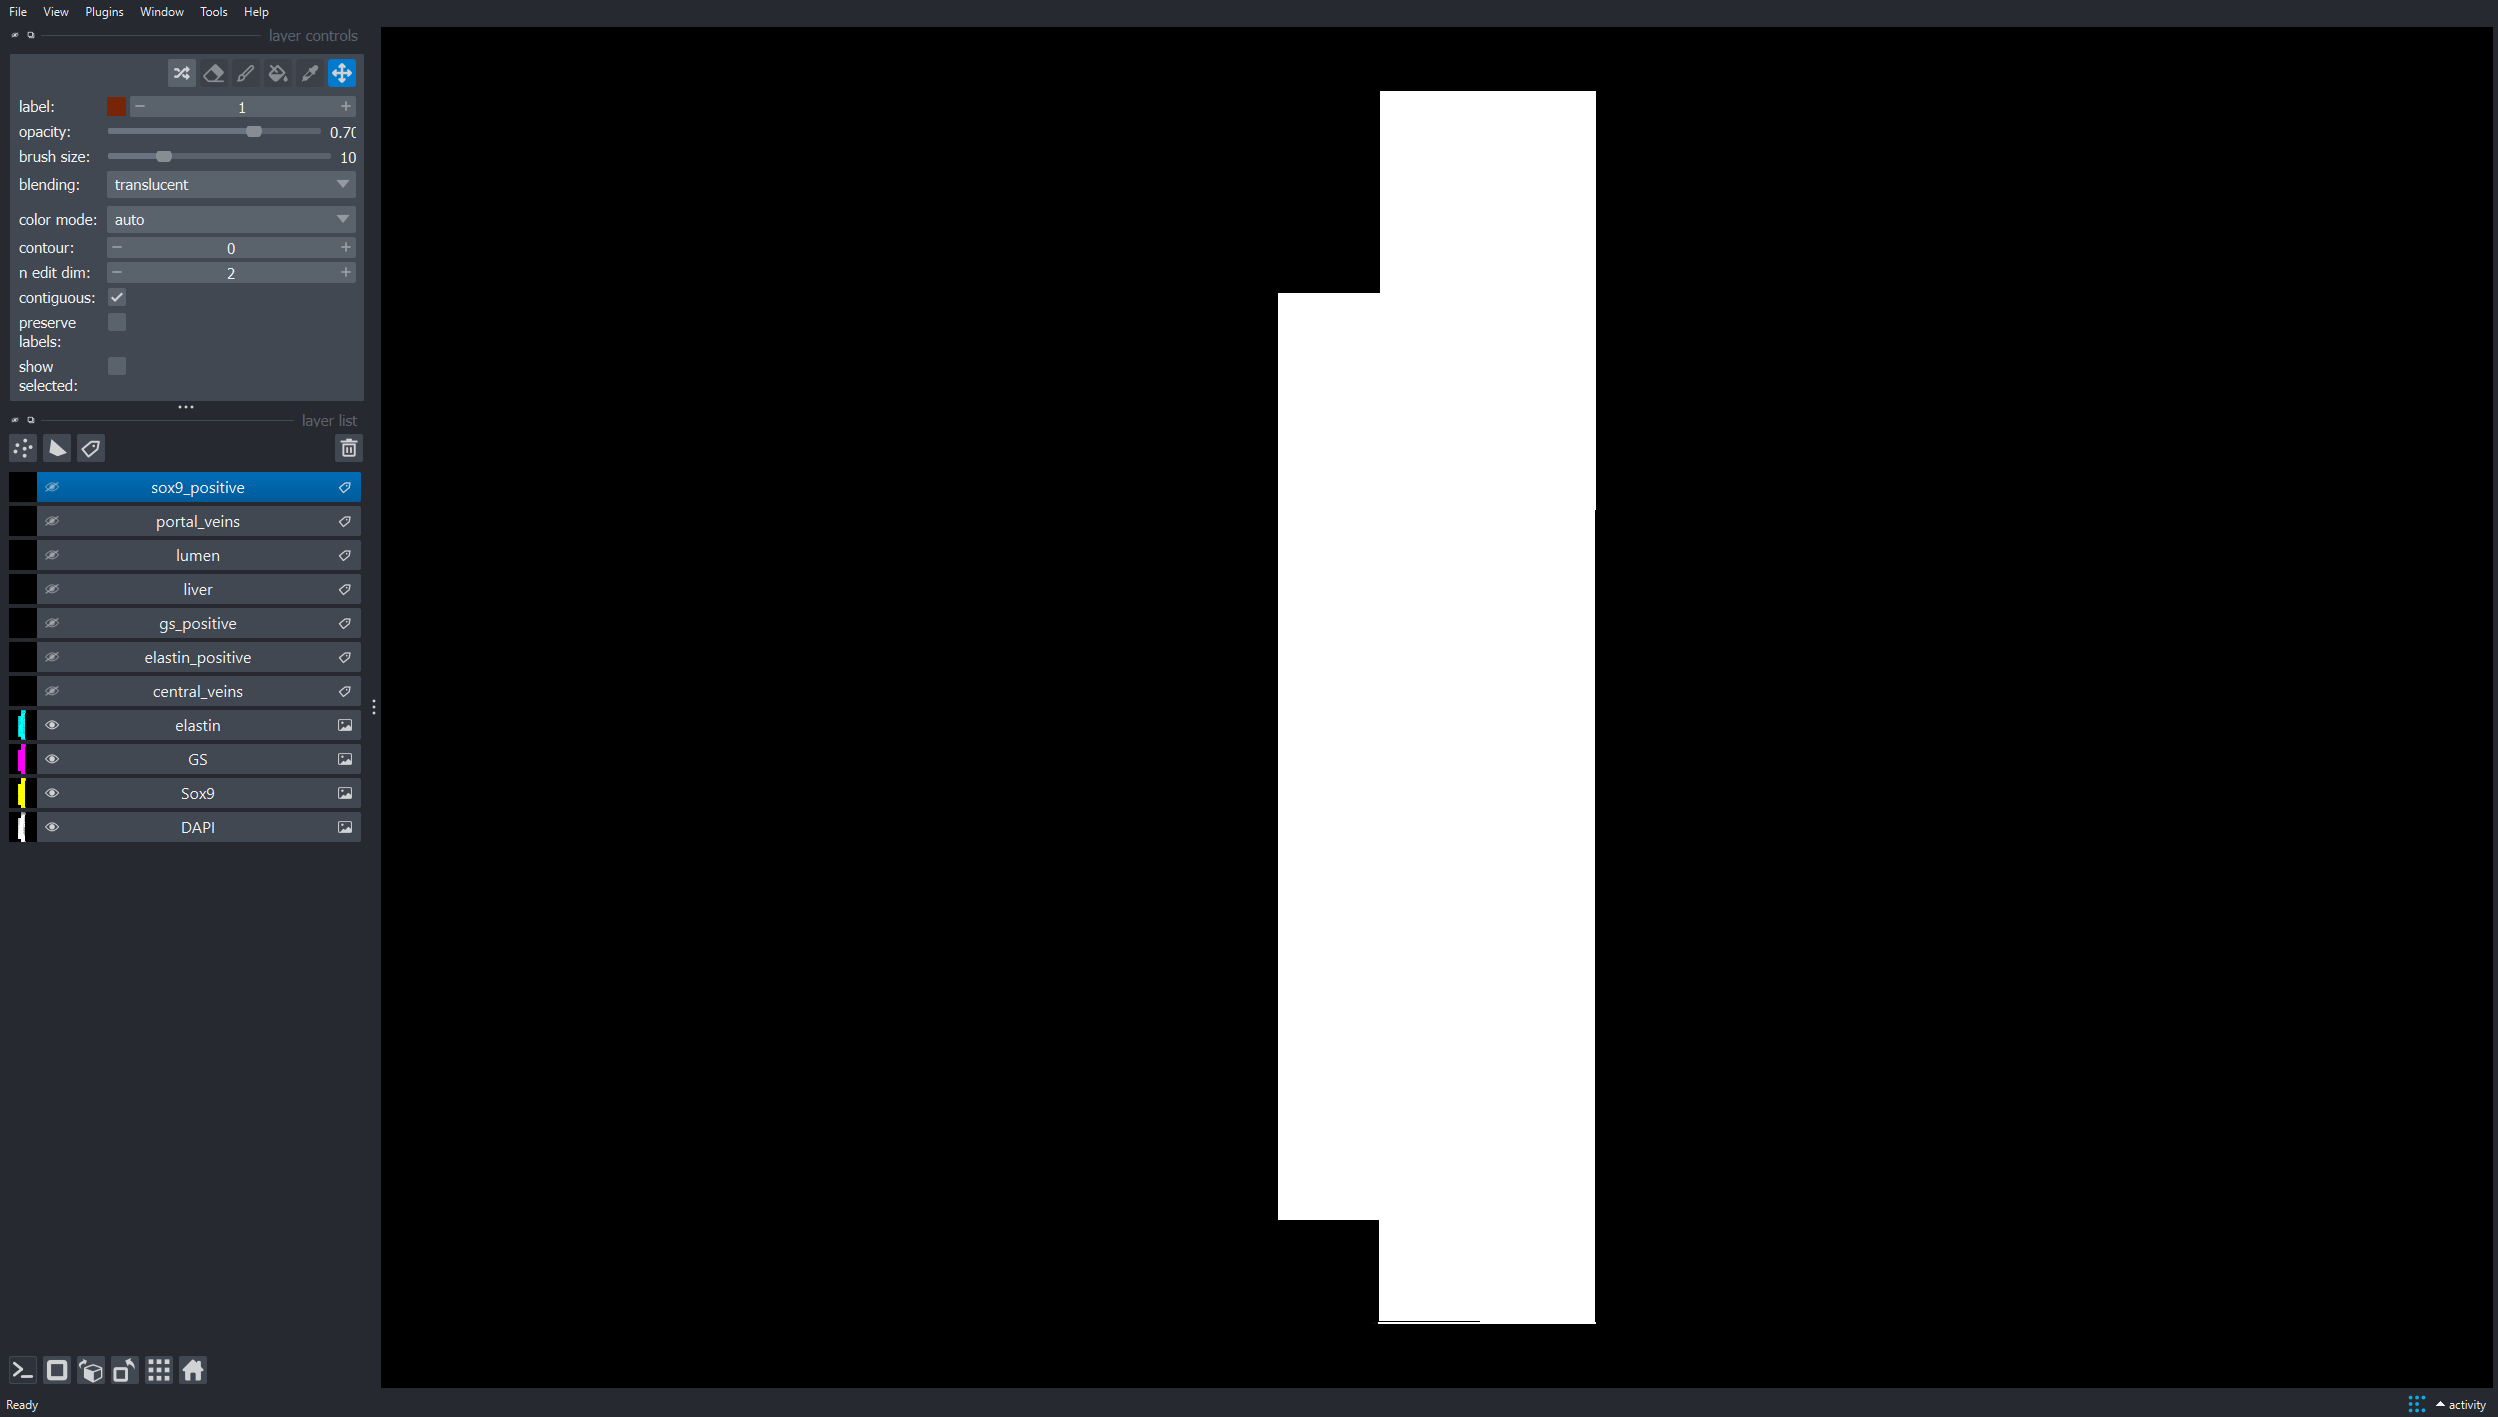

In [4]:
viewer = napari.Viewer()

viewer.open(DATA_DIR, plugin="napari-ome-zarr")
napari.utils.nbscreenshot(viewer)

In [5]:
for_training = imread("../train/bile_duct_classes_N3 B9-1 10x.tiff")

04-Jan-24 14:40:53 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C4F65EFD0>: None
04-Jan-24 14:40:53 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C4F5CD390>: None
04-Jan-24 14:40:53 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C4F5E7210>: None
04-Jan-24 14:40:53 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C4F5F1090>: None
04-Jan-24 14:40:53 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C4F5FED10>: None
04-Jan-24 14:40:53 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C4F5C0B10>: None
04-Jan-24 14:40:53 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C7005E750>: None


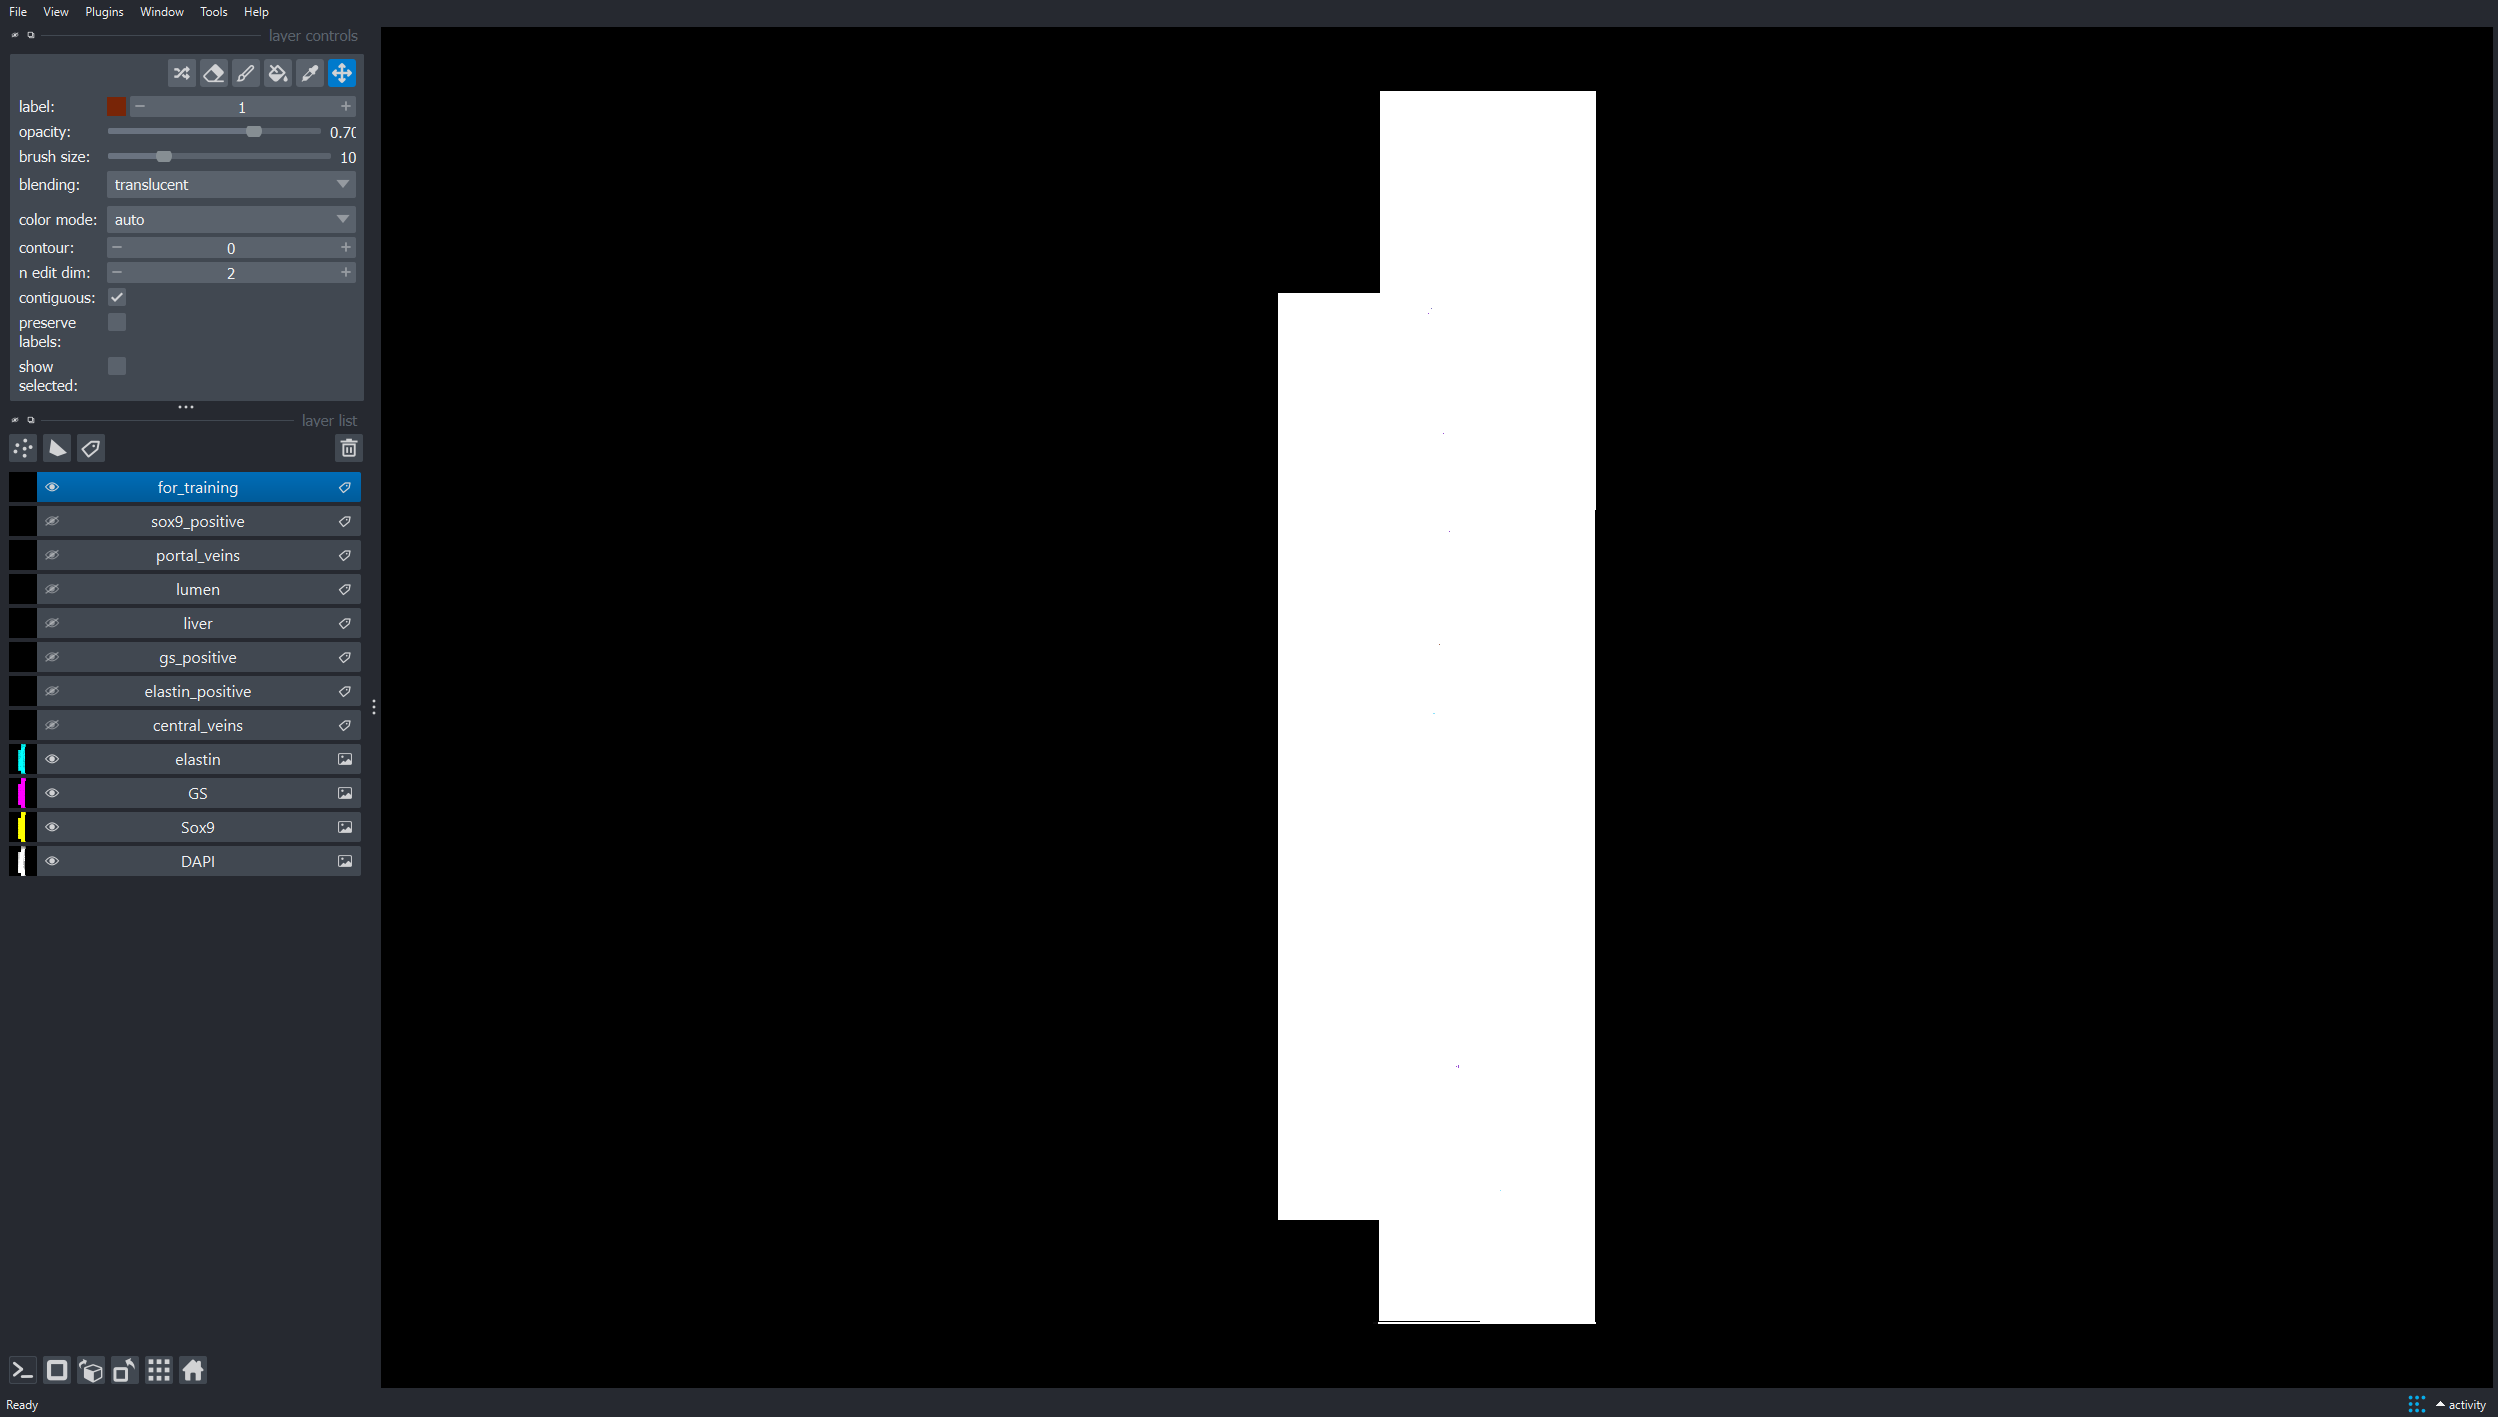

In [6]:
viewer = napari.Viewer()

viewer.open(DATA_DIR, plugin="napari-ome-zarr")
viewer.add_labels(for_training)
napari.utils.nbscreenshot(viewer)

In [7]:
DATA_DIR = Path("../data/6 B9-3 10x.zarr")

image = get_image(DATA_DIR, 0)

04-Jan-24 14:40:57 - gulliver.io - WARNING  - zarr image already exists


04-Jan-24 14:40:58 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C03D8AC50>: None
04-Jan-24 14:40:58 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C03D94D10>: None
04-Jan-24 14:40:58 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C03D9EC90>: None
04-Jan-24 14:40:58 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C03DA4D50>: None
04-Jan-24 14:40:58 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C03DB2CD0>: None
04-Jan-24 14:40:58 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C03DB8B90>: None
04-Jan-24 14:40:58 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019C03DC6A90>: None


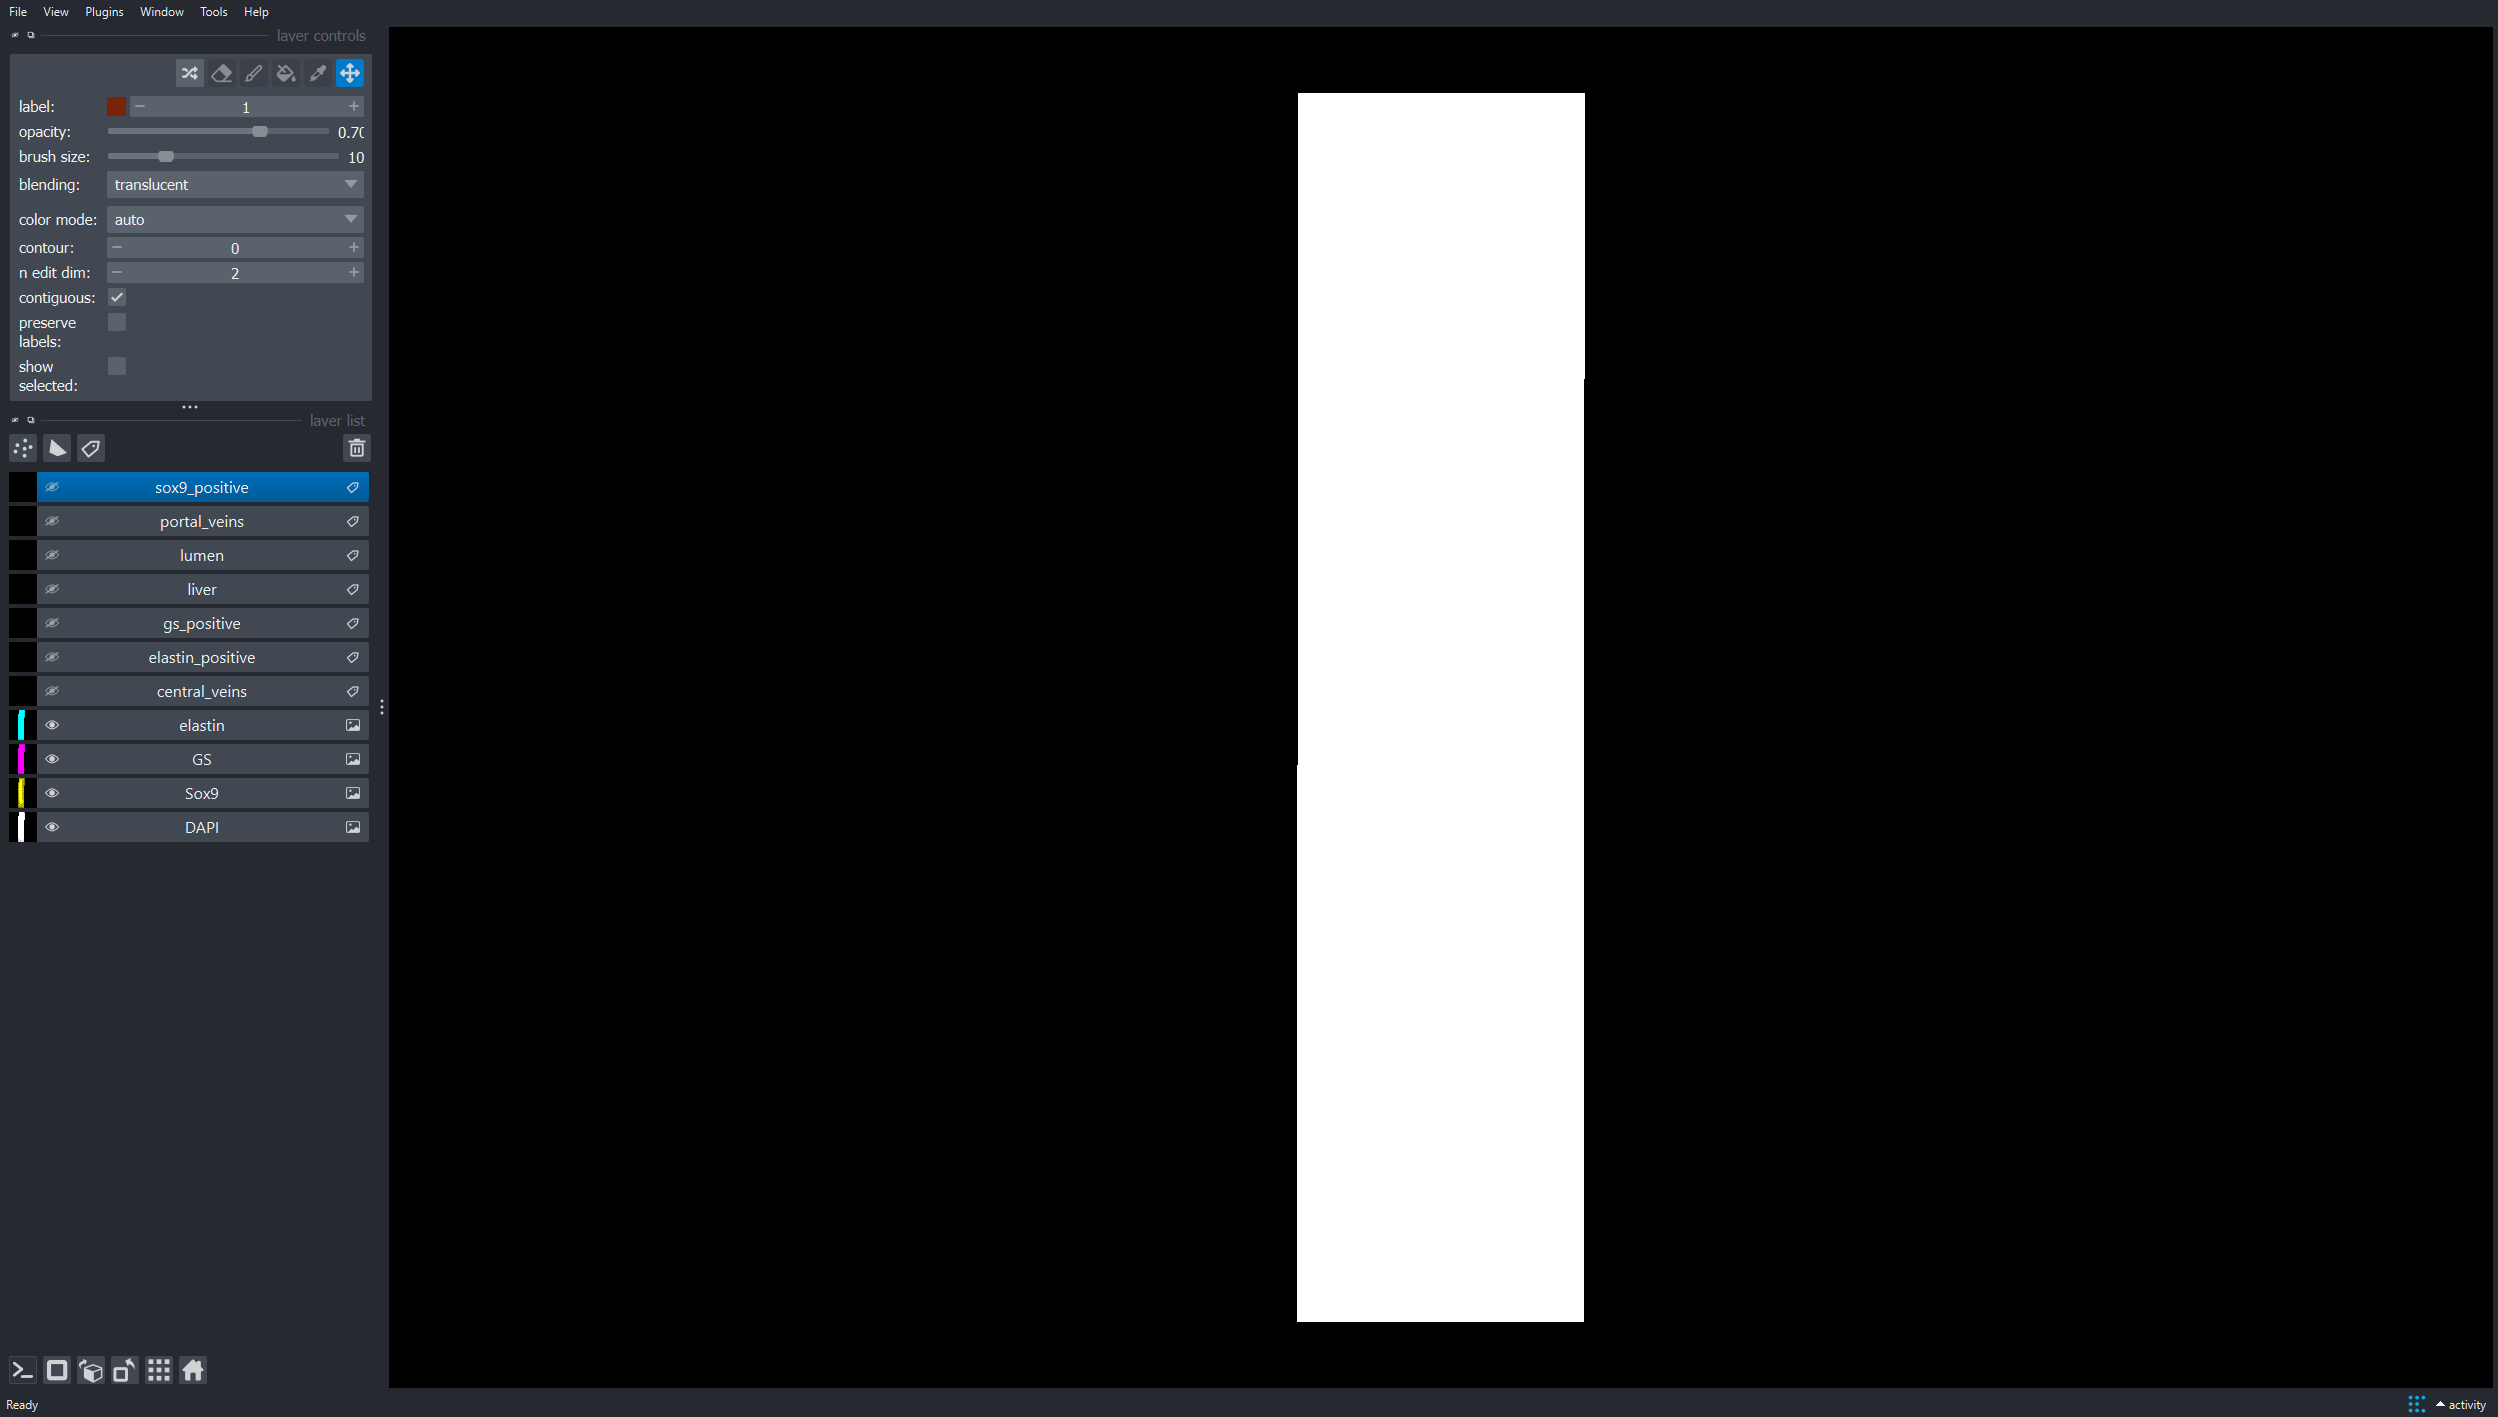

In [8]:
viewer = napari.Viewer()

viewer.open(DATA_DIR, plugin="napari-ome-zarr")
napari.utils.nbscreenshot(viewer)

In [9]:
for_training = imread("../train/bile_duct_classes_6 B9-3 10x.tiff")

04-Jan-24 14:41:01 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019CA5EEB010>: None
04-Jan-24 14:41:01 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019CA5ECF390>: None
04-Jan-24 14:41:01 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019CA5EAAF10>: None
04-Jan-24 14:41:01 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019CA5EB4F50>: None
04-Jan-24 14:41:01 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019CA5EAEED0>: None
04-Jan-24 14:41:01 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019CA5E98E50>: None
04-Jan-24 14:41:01 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019CA5EA6C50>: None


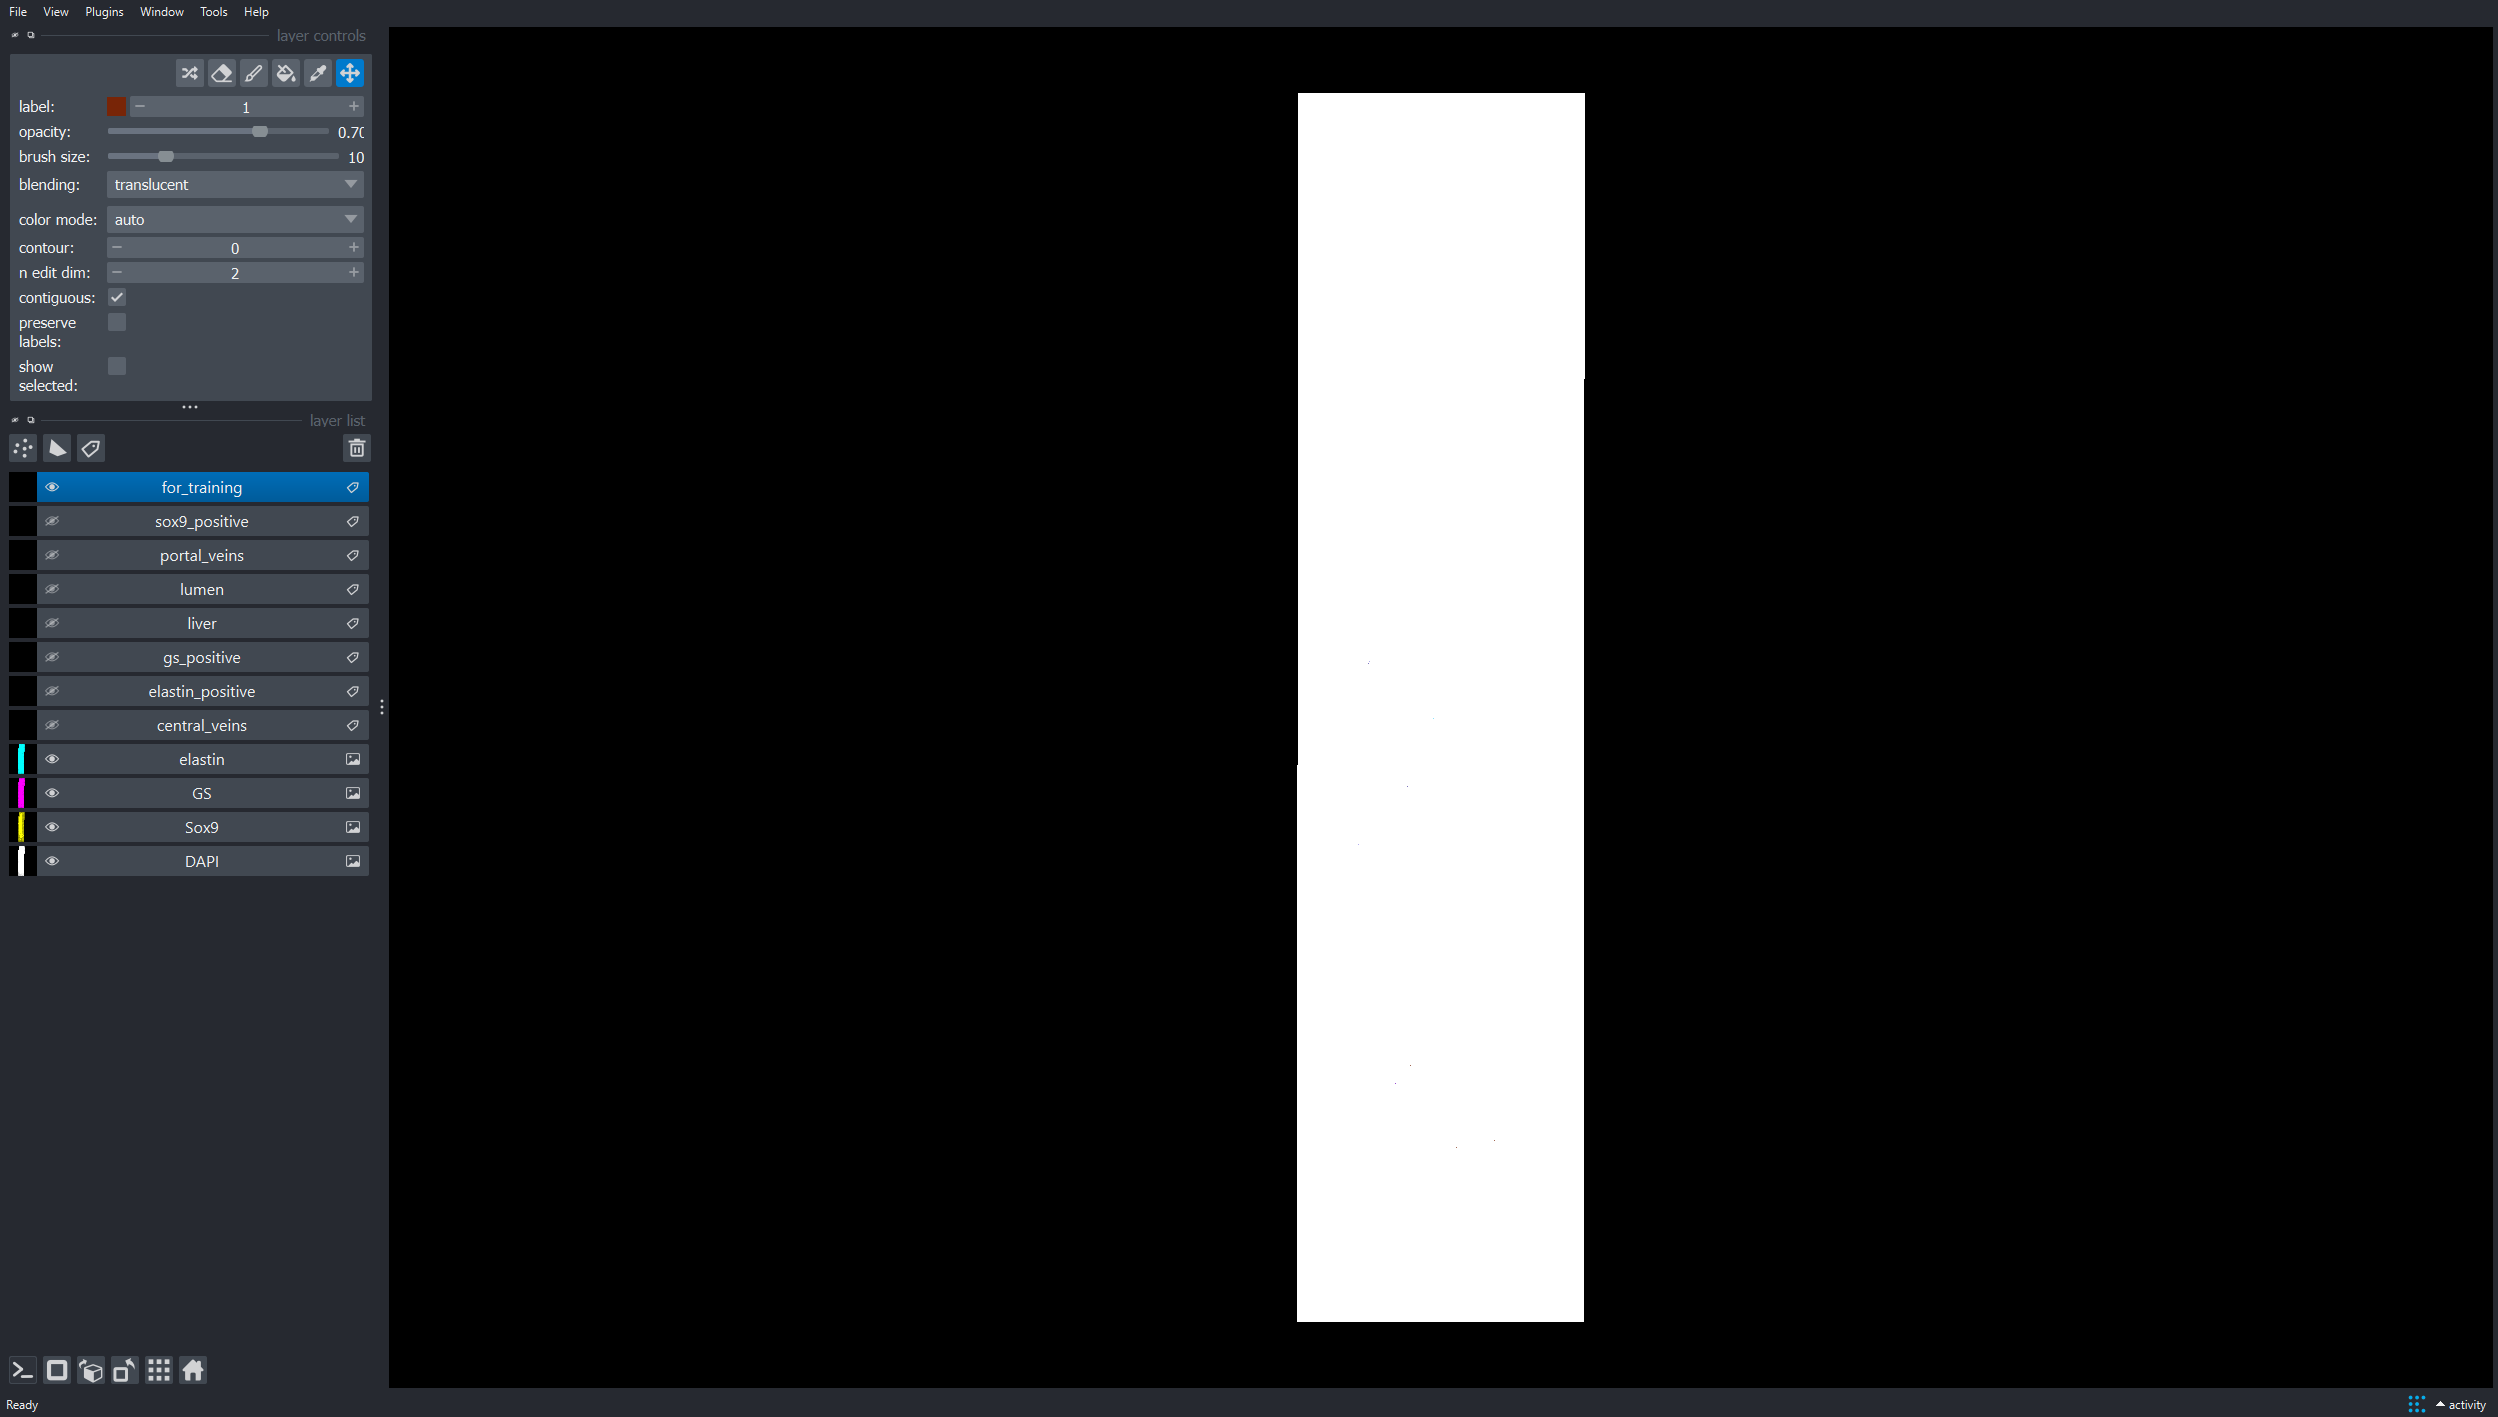

In [10]:
viewer = napari.Viewer()

viewer.open(DATA_DIR, plugin="napari-ome-zarr")
viewer.add_labels(for_training)
napari.utils.nbscreenshot(viewer)

After setting the classes for some of the Sox9+ cells, we can train a classifier

In [11]:
training_paths = [
    (
        Path("../data/6 B9-3 10x.zarr"),
        Path("../train/bile_duct_classes_6 B9-3 10x.tiff"),
    ),
    (
        Path("../data/N2 B9-4 10x.zarr"),
        Path("../train/bile_duct_classes_N2 B9-4 10x.tiff"),
    ),
    (
        Path("../data/N3 B9-1 10x.zarr"),
        Path("../train/bile_duct_classes_N3 B9-1 10x.tiff"),
    ),
]

properties = []
for filepath, annotation_path in training_paths:
    image = get_image(filepath, 0)
    for_training = imread(annotation_path)

    these_properties = get_sox9_properties(
        sox9_positive=get_labels_from_zarr(image, "sox9_positive"),
        lumen=get_labels_from_zarr(image, "lumen")[:],
        annotation=for_training,
        scale=get_scale_from_zarr(image)["x"],
    )
    these_properties["image_name"] = filepath.stem
    these_properties = these_properties.reset_index().set_index(
        ["image_name", "label"], verify_integrity=True
    )
    properties.append(these_properties)

04-Jan-24 14:41:05 - gulliver.io - WARNING  - zarr image already exists
04-Jan-24 14:41:21 - gulliver.io - WARNING  - zarr image already exists
04-Jan-24 14:41:48 - gulliver.io - WARNING  - zarr image already exists


In [12]:
properties = pd.concat(properties, verify_integrity=True)

In [13]:
properties

area  area_convex  area_filled  axis_major_length  \
image_name  label                                                         
6 B9-3 10x  5      25.3500      31.2650      25.3500           9.100354   
            15     59.1500      77.7400      59.1500          15.501379   
            17     30.4200      32.1100      30.4200           7.950660   
            25     22.8150      23.6600      22.8150           5.983175   
            30     24.9275      26.1950      24.9275           6.121401   
...                    ...          ...          ...                ...   
N3 B9-1 10x 8409   21.1250      22.8150      21.1250           8.678584   
            8413   26.1950      28.3075      26.1950           7.257367   
            8419   25.7725      26.1950      25.7725           6.866391   
            8420   26.1950      27.4625      26.1950           5.971840   
            8421   25.3500      25.7725      25.3500           8.012939   

                   axis_minor_length  bbox-0  bbox-1  bbox-2  bbox-3  \
image_name  label                                                      
6 B9-3 10x  5               3.932741      55    2209      69    2217   
            15              5.729977     126    1992     144    2009   
            17              4.866330     136    1972     144    1984   
            25              4.875812     194    1956     203    1965   
            30              5.193342     242    1883     252    1891   
...                              ...     ...     ...     ...     ...   
N3 B9-1 10x 8409            3.169772   20912    4731   20922    4741   
            8413            4.643138   20916    5320   20926    5330   
            8419            4.777203   20948    4417   20955    4427   
            8420            5.575795   20957    4483   20966    4492   
            8421            4.005186   20961    4680   20973    4686   

                   eccentricity  ...  moments_hu-5  moments_hu-6  perimeter  \
image_name  label                ...                                          
6 B9-3 10x  5          0.901800  ...  6.960071e-05  2.959447e-07  21.700105   
            15         0.929174  ...  1.285731e-05  5.724682e-10  35.442493   
            17         0.790807  ...  1.573222e-10 -2.506323e-14  19.592388   
            25         0.579573  ... -8.050171e-10 -4.286648e-12  16.230866   
            30         0.529370  ... -3.278939e-09  9.036230e-14  16.992388   
...                         ...  ...           ...           ...        ...   
N3 B9-1 10x 8409       0.930913  ... -1.329856e-06 -1.534433e-09  18.069343   
            8413       0.768556  ... -4.755272e-08  1.068968e-10  18.450105   
            8419       0.718297  ... -1.240546e-07 -4.313049e-11  17.215433   
            8420       0.358105  ... -2.048574e-09 -5.036129e-14  17.373149   
            8421       0.866118  ...  6.152987e-08  2.543139e-11  18.134672   

                   solidity  intensity_max  intensity_min  intensity_mean  \
image_name  label                                                           
6 B9-3 10x  5      0.810811            0.0            0.0             0.0   
            15     0.760870            0.0            0.0             0.0   
            17     0.947368            0.0            0.0             0.0   
            25     0.964286            0.0            0.0             0.0   
            30     0.951613            0.0            0.0             0.0   
...                     ...            ...            ...             ...   
N3 B9-1 10x 8409   0.925926            0.0            0.0             0.0   
            8413   0.925373            0.0            0.0             0.0   
            8419   0.983871            0.0            0.0             0.0   
            8420   0.953846            0.0            0.0             0.0   
            8421   0.983607            0.0            0.0             0.0   

                   lumen_distance_max  lumen_distance_min  lumen_distance_mean 

In [14]:
properties_for_classification = [
    "area",
    "area_convex",
    "area_filled",
    "axis_major_length",
    "axis_minor_length",
    "eccentricity",
    "euler_number",
    "extent",
    "feret_diameter_max",
    "perimeter",
    "solidity",
    "lumen_distance_max",
    "lumen_distance_min",
    "lumen_distance_mean",
]

properties_for_classification += [
    "moments_hu-%s" % str(num) for num in range(7)
]

Now that we have a table with all the properties that might be useful for classification, we can select the ones we already classified and use them for training.

In [15]:
training_table = properties.query("intensity_max > 0")

In [16]:
training_labels = training_table.index
ground_truth = training_table["intensity_max"].astype(int)

In [17]:
min_number = min(
    training_table["intensity_max"].value_counts()
)  # .query("image_name == '6 B9-3 10x'")
small_training_table = training_table.groupby("intensity_max").sample(
    min_number, random_state=42
)
small_ground_truth = small_training_table["intensity_max"].astype(int)

We will make a Table Row Classifier from APOC with 300 trees and a depth of 7.

In [18]:
cl_filename = "Sox9ObjectClassifier.model.cl"
num_trees = 300
max_depth = 7

apoc.erase_classifier(cl_filename)
classifier = apoc.TableRowClassifier(
    cl_filename, num_ensembles=num_trees, max_depth=max_depth
)
classifier.train(training_table[properties_for_classification], ground_truth)

The next function will load the original classifier saved in the package folder.

In [19]:
prediction = predict_bile_duct_classes_from_table(properties)

Once we have the prediction, we can add it to the table and we can relabel the figure to have the classes shown in the image and assess the classifier. We can measure its accurracy by comparing to the ground truth used to train (which is not proper way as it is the data with which it was trained).

In [20]:
training_indexes = properties.intensity_max.values.astype(int) > 0
comparison = (
    properties[training_indexes].intensity_max.values.astype(int)
    == prediction[training_indexes]
)
print(sum(comparison) / len(comparison))

0.875


In [21]:
DATA_DIR = Path("../data/6 B9-3 10x.zarr")

image = get_image(DATA_DIR, 0)

04-Jan-24 14:42:05 - gulliver.io - WARNING  - zarr image already exists


In [22]:
sel_properties = properties.query("image_name == '6 B9-3 10x'")
sel_prediction = predict_bile_duct_classes_from_table(sel_properties)

In [23]:
sel_labels = sel_properties.index.get_level_values("label")

In [24]:
predicted_image = relabel_by_values(
    get_labels_from_zarr(image, "sox9_positive"),
    labels=sel_labels,
    values=sel_prediction.tolist(),
)

04-Jan-24 14:42:07 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019CF908AF90>: None
04-Jan-24 14:42:07 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019CF8D8D090>: None
04-Jan-24 14:42:07 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019CF8D5B010>: None
04-Jan-24 14:42:07 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019CF8D00F90>: None
04-Jan-24 14:42:07 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019CF8D72E50>: None
04-Jan-24 14:42:07 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019CF8D6CE50>: None
04-Jan-24 14:42:07 - ome_zarr.reader - WARNING  - no parent found for <ome_zarr.reader.Label object at 0x0000019CF8D8AC90>: None


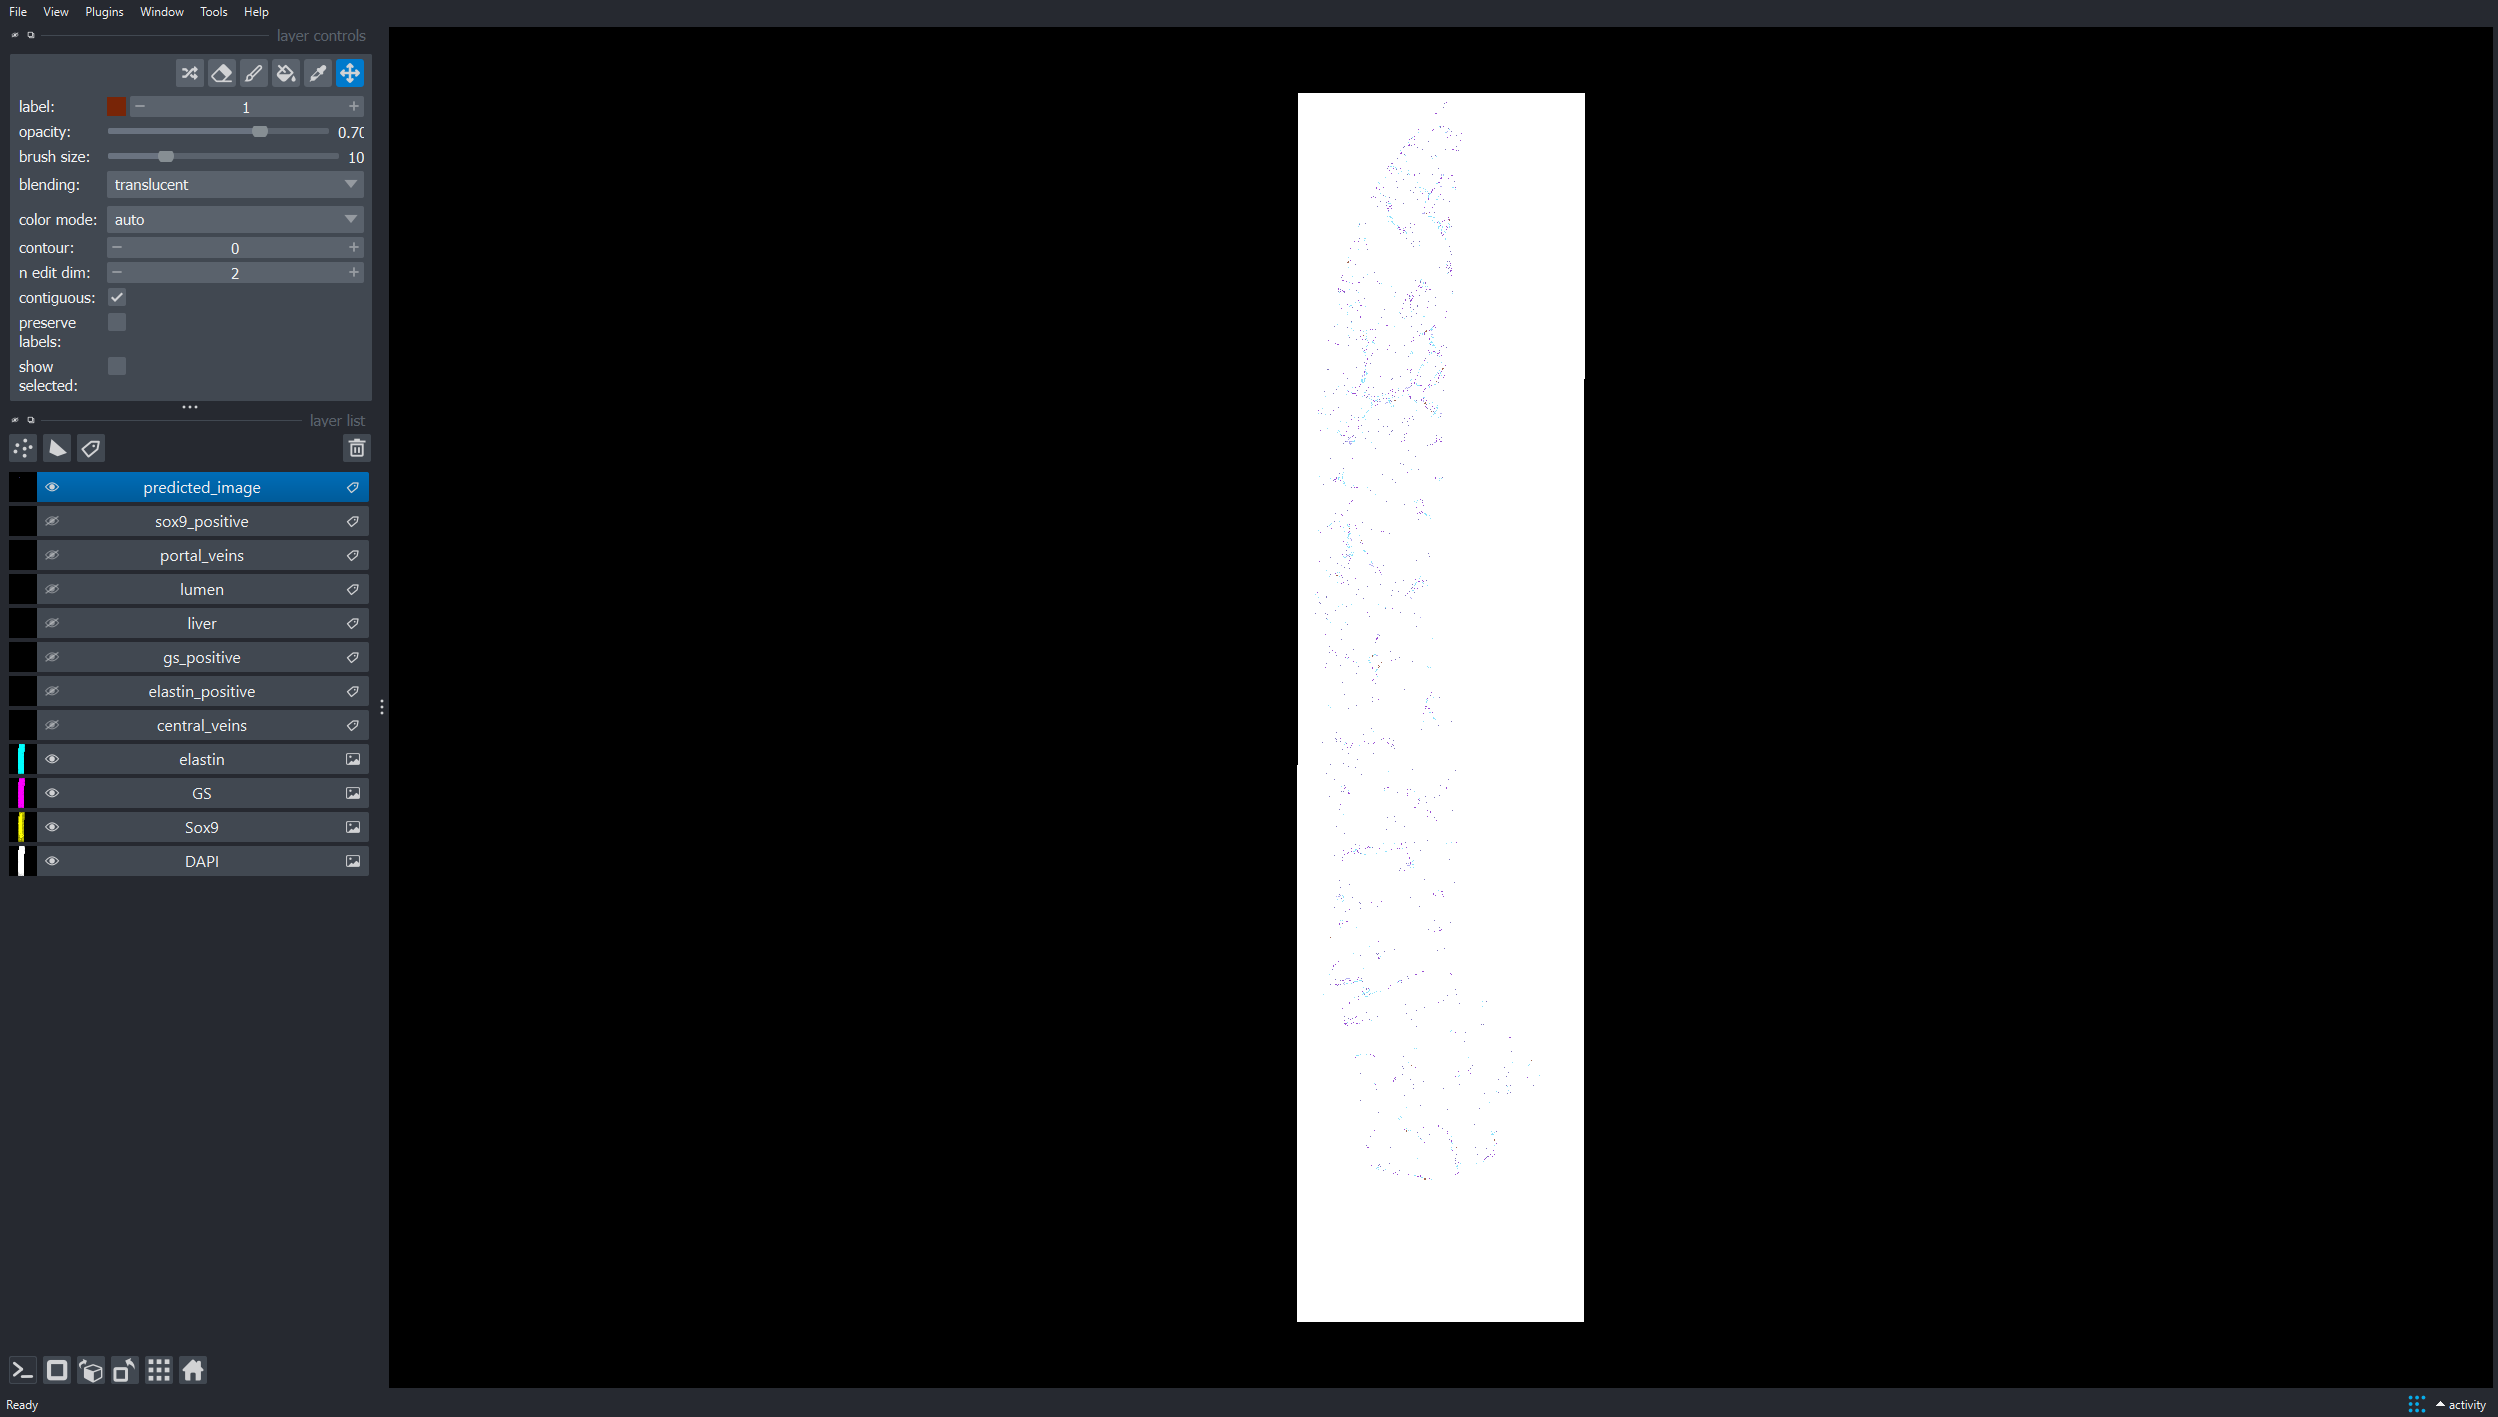

In [25]:
viewer = napari.Viewer()

viewer.open(DATA_DIR, plugin="napari-ome-zarr")
viewer.add_labels(predicted_image)
napari.utils.nbscreenshot(viewer)

Although the accurracy looks high, it it only measured with the training set so it might look high only because it already knows the data.